/tmp/ipython-input-1-178667634.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Cases", data=df, palette="Blues_d")


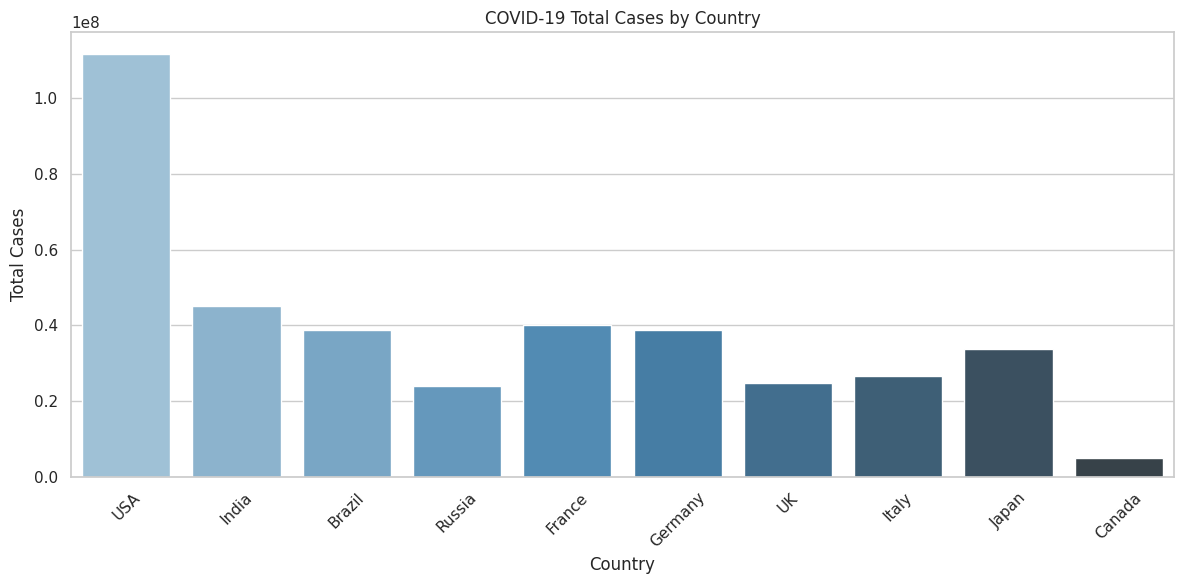

/tmp/ipython-input-1-178667634.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Deaths", data=df, palette="Reds_d")


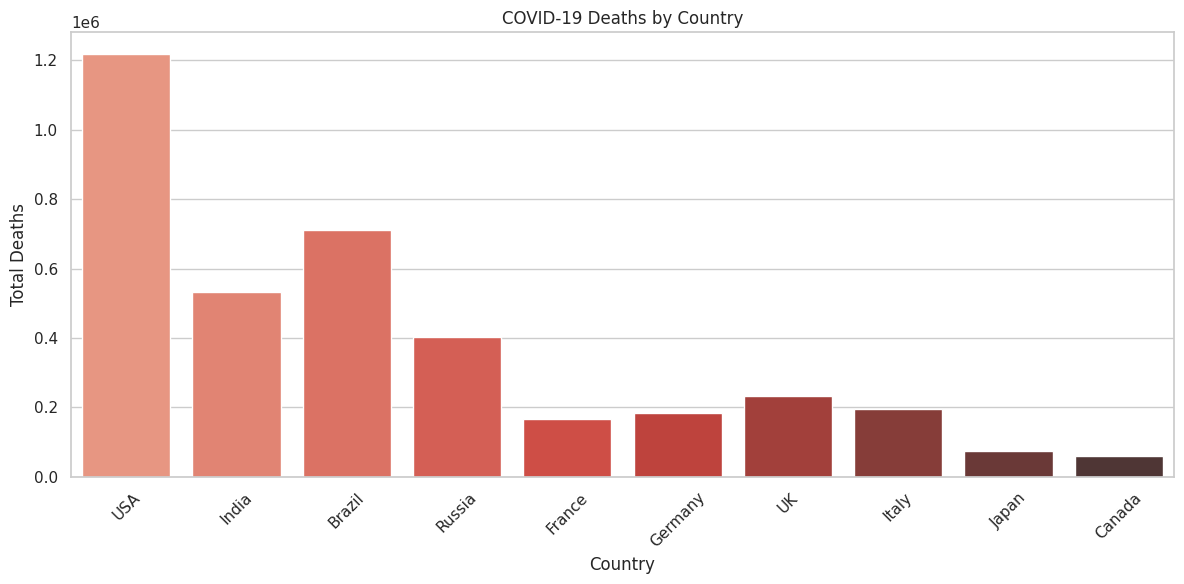

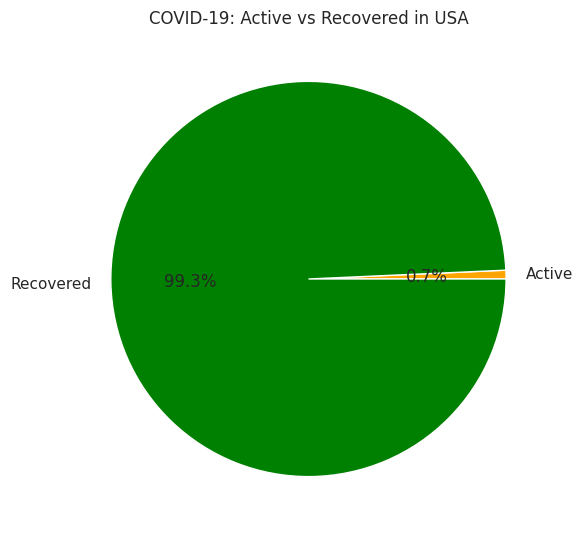

In [ ]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of countries to analyze
countries = ["USA", "India", "Brazil", "Russia", "France", "Germany", "UK", "Italy", "Japan", "Canada"]

# Base URL
API_URL = "https://disease.sh/v3/covid-19/countries/"

# Data containers
country_data = []

# Fetch data for each country
for country in countries:
    try:
        response = requests.get(API_URL + country)
        data = response.json()

        country_data.append({
            "Country": country,
            "Cases": data["cases"],
            "Deaths": data["deaths"],
            "Recovered": data["recovered"],
            "Active": data["active"]
        })
    except Exception as e:
        print(f"Error fetching data for {country}: {e}")

# Convert to DataFrame
df = pd.DataFrame(country_data)

# Set style
sns.set(style="whitegrid")

# --- Visualization 1: Total Cases ---
plt.figure(figsize=(12, 6))
sns.barplot(x="Country", y="Cases", data=df, palette="Blues_d")
plt.title("COVID-19 Total Cases by Country")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Visualization 2: Deaths ---
plt.figure(figsize=(12, 6))
sns.barplot(x="Country", y="Deaths", data=df, palette="Reds_d")
plt.title("COVID-19 Deaths by Country")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Visualization 3: Active vs Recovered (Pie for Top 1 Country) ---
top_country = df.sort_values(by="Cases", ascending=False).iloc[0]
labels = ["Active", "Recovered"]
sizes = [top_country["Active"], top_country["Recovered"]]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["orange", "green"])
plt.title(f"COVID-19: Active vs Recovered in {top_country['Country']}")
plt.tight_layout()
plt.show()
